In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medical_data=pd.read_csv(r"D:\sofronics\Machine Learning\Datasets\insurance.csv")
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medical_data.shape

(1338, 7)

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_data.duplicated().sum()

1

In [8]:
medical_data.drop_duplicates(inplace=True)

In [9]:
medical_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

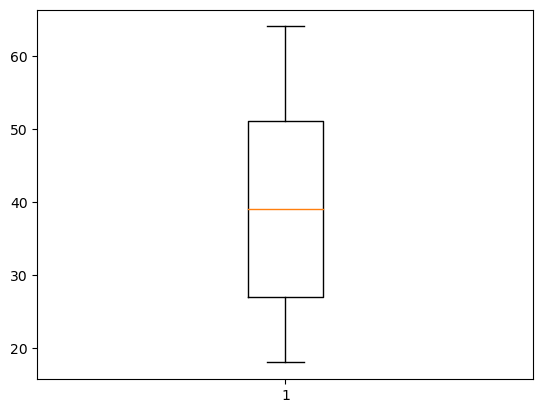

In [10]:
plt.boxplot(medical_data['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

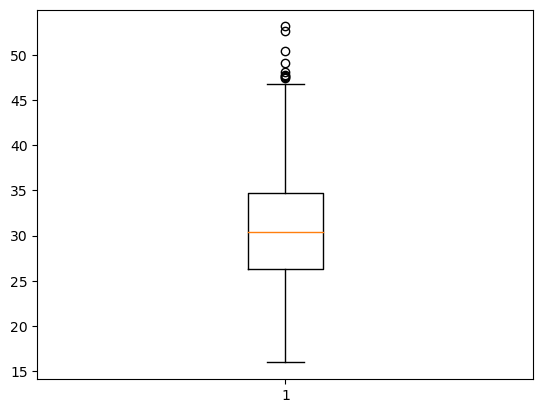

In [11]:
plt.boxplot(medical_data['bmi'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

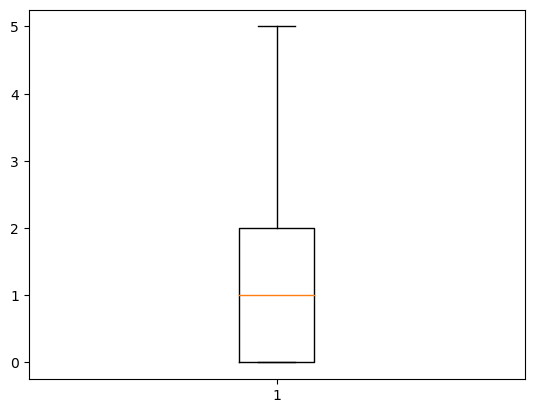

In [12]:
plt.boxplot(medical_data['children'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

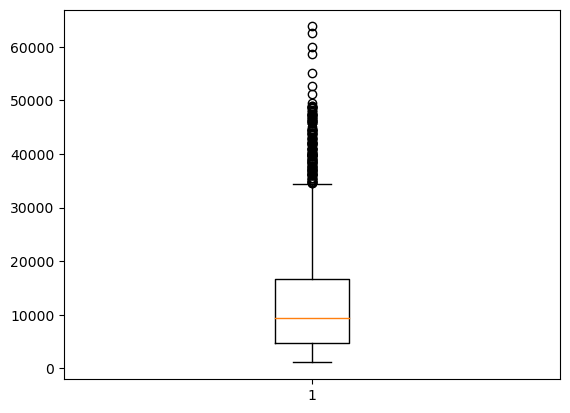

In [13]:
plt.boxplot(medical_data['charges'])
plt.show

In [14]:
def remove_outliers(d,c):
  
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr(inter quantile range)
    iqr=q3-q1
    
    #find upper bound(ub)and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    #filter good data(ie eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier
    

<function matplotlib.pyplot.show(close=None, block=None)>

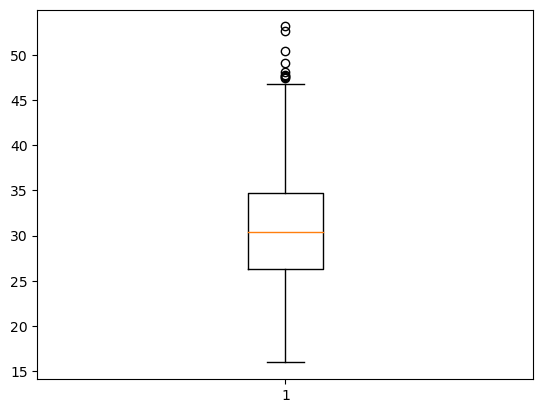

In [21]:
remove_outliers(medical_data,'bmi')
plt.boxplot(medical_data['bmi'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

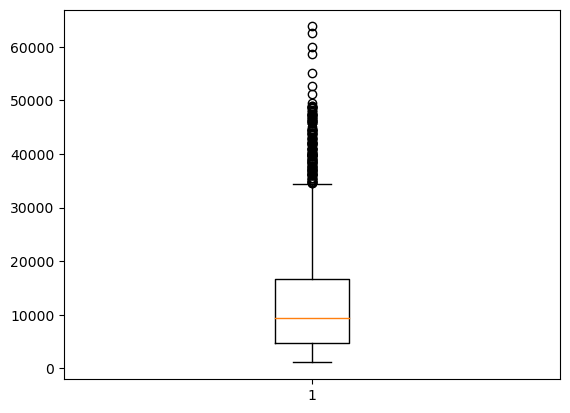

In [23]:
remove_outliers(medical_data,'charges')
plt.boxplot(medical_data['charges'])
plt.show

In [24]:
medical_data.shape

(1337, 7)